In [2]:
# Import librarires
import pandas as pd
from pandas.api.types import CategoricalDtype
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Import Excel File
excel_path = 'Comparison_Data/chem_1_chem_2_comparisons.xlsx'
excel_file = pd.ExcelFile(excel_path)


In [4]:
# Filter for sheets that start with 'Fall'
fall_sheets = [
    s for s in excel_file.sheet_names
    if s.strip().lower().startswith('fall') and 'overview' not in s.strip().lower()
]


In [5]:
# Empty list to hold sheets data
Fall_Sheet_Data = []

In [6]:
# Define desired columns
keep_prefixes = ('ID', 'Chem 1', 'Chem 2', 'Result', 'Hours', 'GPA')


In [7]:
# Loop through the Fall sheets
for sheet in fall_sheets:
    # Read the entire sheet first (headers included)
    temp_df = pd.read_excel(excel_path, sheet_name=sheet)
    
    # Select only columns that start with the allowed prefixes
    cols_to_keep = [c for c in temp_df.columns if str(c).startswith(keep_prefixes)]
    
    # Keep only those columns
    temp_df = temp_df[cols_to_keep]
    
    # Add the term label
    temp_df['Term'] = sheet
    
    # Append to list
    Fall_Sheet_Data.append(temp_df)

In [8]:
# Combine all Fall data into one DataFrame
Chemistry_Fall = pd.concat(Fall_Sheet_Data, ignore_index=True)

In [9]:
# Display raw 
display(Chemistry_Fall)

,ID,Chem 1,Chem 2,Result,Hours,Term,GPA
0,822.881740,A,C,lower,22,Fall 21 to Spring 22,NaN
1,458.795375,B,C,lower,10,Fall 21 to Spring 22,NaN
2,140.464583,C,A,higher,17,Fall 21 to Spring 22,NaN
3,939.579554,B,B,same,16,Fall 21 to Spring 22,NaN
4,736.099023,D,C,higher,28,Fall 21 to Spring 22,NaN
...,...,...,...,...,...,...,...
1332,224.596799,A,A,same,60,Fall 24 to Spring 25,3.367
1333,287.991566,B,A,higher by 1,62,Fall 24 to Spring 25,3.597
1334,508.329115,B,C,lower by 1,64,Fall 24 to Spring 25,3.547
1335,44.859210,B,D,lower by 2,71,Fall 24 to Spring 25,2.958


In [10]:
# Make the grades in Chem 1 and Chem 2 ordered.
grade_order = ['A', 'B', 'C', 'D', 'W', 'F']
grade_type = CategoricalDtype(categories=grade_order, ordered=True)

# Convert to ordered type.
Chemistry_Fall['Chem 1'] = Chemistry_Fall['Chem 1'].astype(grade_type)
Chemistry_Fall['Chem 2'] = Chemistry_Fall['Chem 2'].astype(grade_type)

In [11]:
# Reconfigure Result to be consistent
def compute_result(row):
    chem_1_grade = row['Chem 1']
    chem_2_grade = row['Chem 2']

    # Handle missing grades
    if pd.isna(chem_1_grade) or pd.isna(chem_2_grade):
        return None

    # Special rule: withdrawal
    if chem_2_grade == 'W':
        return 'withdrawal'

    # Normal logic
    if chem_1_grade == chem_2_grade:
        return 'same'
    elif chem_2_grade > chem_1_grade:
        diff = grade_order.index(chem_2_grade) - grade_order.index(chem_1_grade)
        return f'lower by {diff}'
    else:
        diff = grade_order.index(chem_1_grade) - grade_order.index(chem_2_grade)
        return f'higher by {diff}'


In [12]:
Chemistry_Fall['Result'] = Chemistry_Fall.apply(compute_result, axis=1)


In [13]:
display(Chemistry_Fall)

,ID,Chem 1,Chem 2,Result,Hours,Term,GPA
0,822.881740,A,C,lower by 2,22,Fall 21 to Spring 22,NaN
1,458.795375,B,C,lower by 1,10,Fall 21 to Spring 22,NaN
2,140.464583,C,A,higher by 2,17,Fall 21 to Spring 22,NaN
3,939.579554,B,B,same,16,Fall 21 to Spring 22,NaN
4,736.099023,D,C,higher by 1,28,Fall 21 to Spring 22,NaN
...,...,...,...,...,...,...,...
1332,224.596799,A,A,same,60,Fall 24 to Spring 25,3.367
1333,287.991566,B,A,higher by 1,62,Fall 24 to Spring 25,3.597
1334,508.329115,B,C,lower by 1,64,Fall 24 to Spring 25,3.547
1335,44.859210,B,D,lower by 2,71,Fall 24 to Spring 25,2.958


In [14]:
# IDs were made with RandInt; make new ID scheme
Chemistry_Fall = Chemistry_Fall.reset_index(drop=True)
Chemistry_Fall['ID'] = range(1, len(Chemistry_Fall) + 1)

In [15]:
display(Chemistry_Fall)

,ID,Chem 1,Chem 2,Result,Hours,Term,GPA
0,1,A,C,lower by 2,22,Fall 21 to Spring 22,NaN
1,2,B,C,lower by 1,10,Fall 21 to Spring 22,NaN
2,3,C,A,higher by 2,17,Fall 21 to Spring 22,NaN
3,4,B,B,same,16,Fall 21 to Spring 22,NaN
4,5,D,C,higher by 1,28,Fall 21 to Spring 22,NaN
...,...,...,...,...,...,...,...
1332,1333,A,A,same,60,Fall 24 to Spring 25,3.367
1333,1334,B,A,higher by 1,62,Fall 24 to Spring 25,3.597
1334,1335,B,C,lower by 1,64,Fall 24 to Spring 25,3.547
1335,1336,B,D,lower by 2,71,Fall 24 to Spring 25,2.958


In [16]:
print(Chemistry_Fall.columns.tolist())


['ID', 'Chem 1', 'Chem 2', 'Result', 'Hours', 'Term', 'GPA']


/var/folders/fp/sbrd1tys4vd2hzst6fyx9qfr0000gn/T/ipykernel_56433/259825885.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


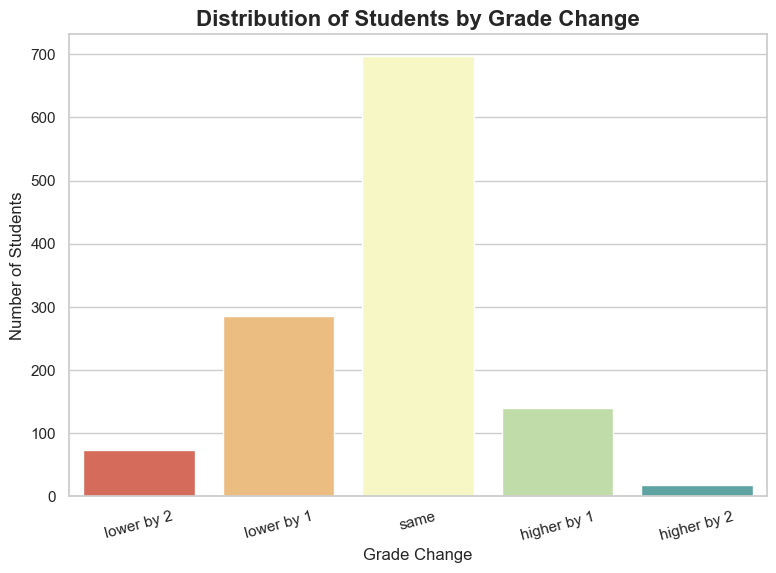

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(9,6))
sns.countplot(
    data=Chemistry_Fall,
    x='Result',
    order=['lower by 2', 'lower by 1', 'same', 'higher by 1', 'higher by 2'],
    palette="Spectral"
)
plt.title('Distribution of Students by Grade Change', fontsize=16, weight='bold')
plt.ylabel('Number of Students', fontsize=12)
plt.xlabel('Grade Change', fontsize=12)
plt.xticks(rotation=15)
plt.show()

/var/folders/fp/sbrd1tys4vd2hzst6fyx9qfr0000gn/T/ipykernel_56433/1662737965.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


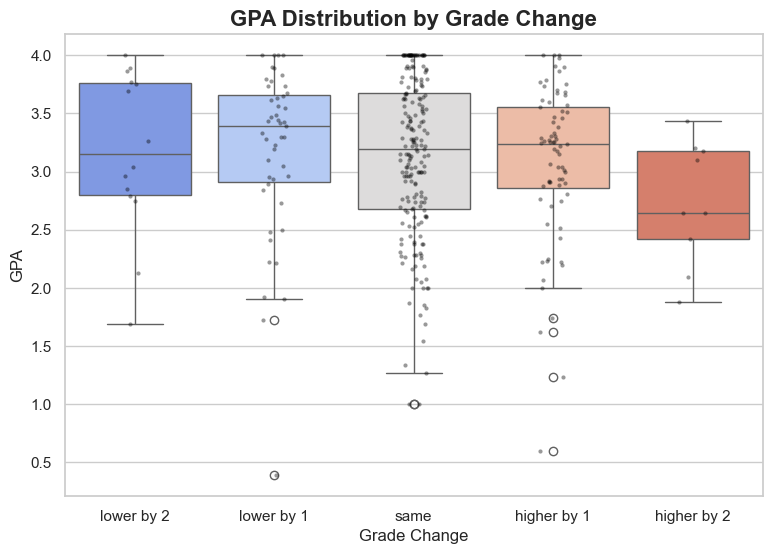

In [18]:
plt.figure(figsize=(9,6))
sns.boxplot(
    data=Chemistry_Fall,
    x='Result',
    y='GPA',
    order=['lower by 2', 'lower by 1', 'same', 'higher by 1', 'higher by 2'],
    palette="coolwarm"
)
sns.stripplot(
    data=Chemistry_Fall,
    x='Result',
    y='GPA',
    order=['lower by 2', 'lower by 1', 'same', 'higher by 1', 'higher by 2'],
    color='black', size=3, alpha=0.4, jitter=True
)
plt.title('GPA Distribution by Grade Change', fontsize=16, weight='bold')
plt.ylabel('GPA', fontsize=12)
plt.xlabel('Grade Change', fontsize=12)
plt.show()

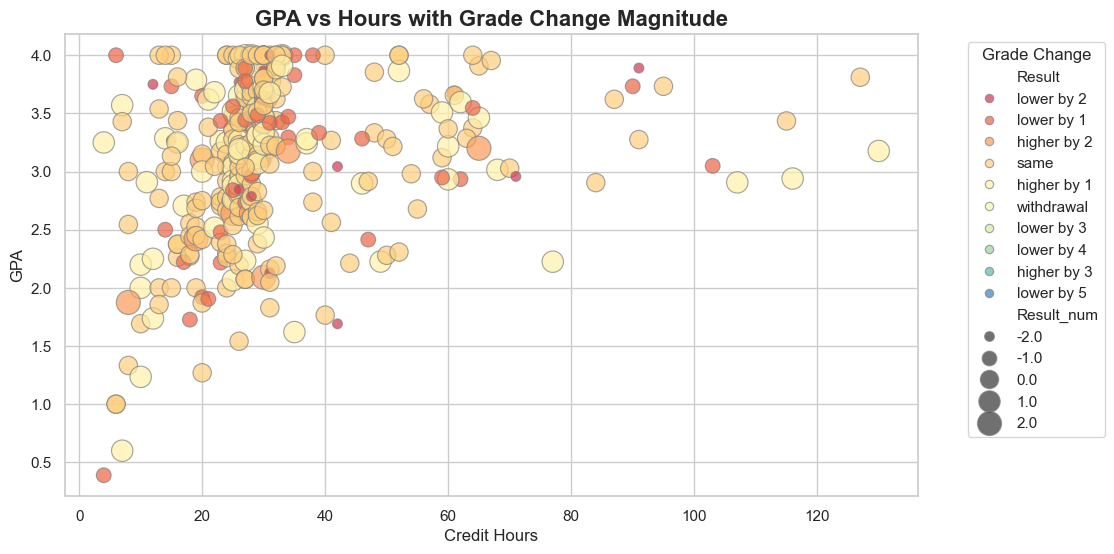

In [19]:
result_map = {'lower by 2': -2, 'lower by 1': -1, 'same': 0, 'higher by 1': 1, 'higher by 2': 2}
Chemistry_Fall['Result_num'] = Chemistry_Fall['Result'].map(result_map)

plt.figure(figsize=(11,6))
sns.scatterplot(
    data=Chemistry_Fall,
    x='Hours',
    y='GPA',
    size='Result_num',
    hue='Result',
    palette='Spectral',
    sizes=(50,300),
    alpha=0.7,
    edgecolor='gray'
)
plt.title('GPA vs Hours with Grade Change Magnitude', fontsize=16, weight='bold')
plt.xlabel('Credit Hours', fontsize=12)
plt.ylabel('GPA', fontsize=12)
plt.legend(title='Grade Change', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


/var/folders/fp/sbrd1tys4vd2hzst6fyx9qfr0000gn/T/ipykernel_56433/3322776662.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(Chemistry_Fall[Chemistry_Fall['Result']==res]['GPA'], label=res)


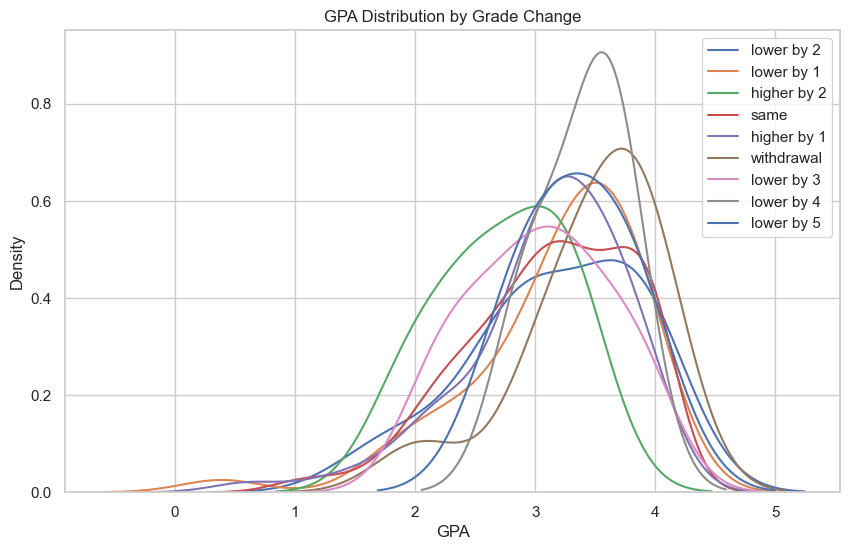

In [20]:
plt.figure(figsize=(10,6))
for res in Chemistry_Fall['Result'].unique():
    sns.kdeplot(Chemistry_Fall[Chemistry_Fall['Result']==res]['GPA'], label=res)
plt.title('GPA Distribution by Grade Change')
plt.xlabel('GPA')
plt.ylabel('Density')
plt.legend()

In [23]:
lower_by_4 = Chemistry_Fall[Chemistry_Fall['Result'] == 'withdrawal']
lower_by_4.head(5)

,ID,Chem 1,Chem 2,Result,Hours,Term,GPA,Result_num
6,7,D,W,withdrawal,26,Fall 21 to Spring 22,NaN,NaN
11,12,C,W,withdrawal,28,Fall 21 to Spring 22,NaN,NaN
25,26,D,W,withdrawal,26,Fall 21 to Spring 22,NaN,NaN
28,29,D,W,withdrawal,13,Fall 21 to Spring 22,NaN,NaN
32,33,F,W,withdrawal,92,Fall 21 to Spring 22,NaN,NaN
